<a href="https://colab.research.google.com/github/cynthiacc512/TA-prediksi-stroke-dnn-dropout/blob/main/DNN_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from scipy.special import expit, logit
from sklearn.utils.class_weight import compute_class_weight

In [2]:
!python --version

Python 3.7.12


In [3]:
import warnings

#suppress warnings
warnings.filterwarnings('ignore')


# Data Preprocessing

In [4]:
df = pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Drop column

In [5]:
df.drop(['id'], axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Cek Data Null

In [6]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [7]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'] = df['smoking_status'].replace(np.nan, 'unknown')

In [8]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Encoding

In [10]:
df['gender'].replace(['Male', 'Female', 'Other'],[0, 1, 2], inplace=True)
df['ever_married'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['work_type'].replace(['Never_worked', 'children', 'Govt_job', 'Private', 'Self-employed'],[0, 1, 2, 3, 4], inplace=True)
df['Residence_type'].replace(['Rural', 'Urban'],[0, 1], inplace=True)
df['smoking_status'].replace(['unknown','never smoked', 'formerly smoked', 'smokes'],[0, 1, 2,3], inplace=True)

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,1,58.64,20.4,1,0
43396,1,56.0,0,0,1,2,1,213.61,55.4,2,0
43397,1,82.0,1,0,1,3,1,91.94,28.9,2,0
43398,0,40.0,0,0,1,3,1,99.16,33.2,1,0


### Cek Data Duplikat

In [12]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [13]:
df.drop_duplicates(keep='last')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,1,58.64,20.4,1,0
43396,1,56.0,0,0,1,2,1,213.61,55.4,2,0
43397,1,82.0,1,0,1,3,1,91.94,28.9,2,0
43398,0,40.0,0,0,1,3,1,99.16,33.2,1,0


### Cleaning Outliers

In [14]:
column = ['age','avg_glucose_level','bmi']
df[column].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,43400.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.638023
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.400000
50%,44.000000,91.580000,28.100000
75%,60.000000,112.070000,32.600000
max,82.000000,291.050000,97.600000


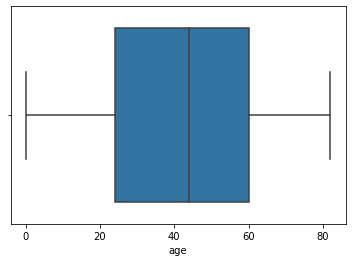

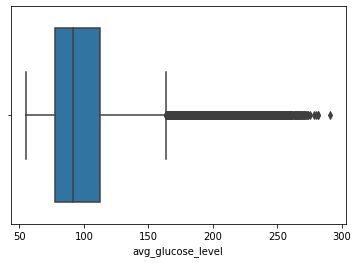

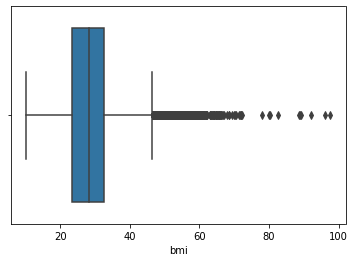

In [15]:
for cols in column:
  sns.boxplot(x=df[cols])
  plt.show()

In [16]:
df = df[(df['bmi'] <= 54 )]
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000
mean,0.591159,42.201443,0.092933,0.047545,0.642855,2.733423,0.501334,104.341120,28.401391,1.167915,0.018114
std,0.492144,22.562909,0.290342,0.212804,0.479163,0.904601,0.500004,42.946278,7.215377,1.027503,0.133363
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.530000,23.400000,0.000000,0.000000
50%,1.000000,44.000000,0.000000,0.000000,1.000000,3.000000,1.000000,91.560000,28.000000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,111.960000,32.500000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,54.000000,3.000000,1.000000


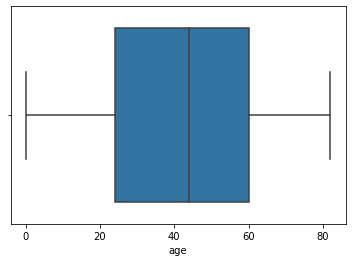

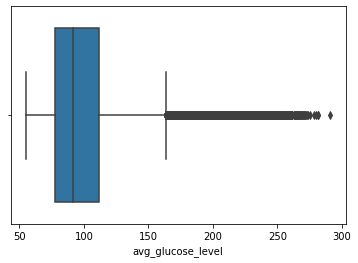

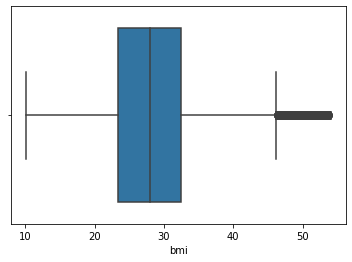

In [17]:
for cols in column:
  sns.boxplot(x=df[cols])
  plt.show()

## Handling Imbalanced Class

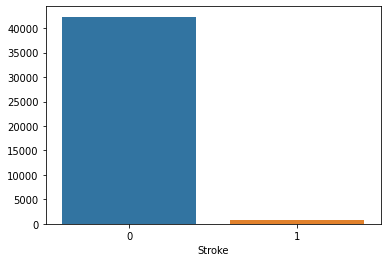

Tidak stroke (0) :  42336
Terkena stroke (1) :  781


In [18]:
xs = df['stroke'].value_counts().index
ys = df['stroke'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("Stroke")
plt.show()
print("Tidak stroke (0) : ", str(ys[0]))
print("Terkena stroke (1) : ", str(ys[1]))

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0


## Split Dataset

In [20]:
x  = df[['gender','age','hypertension','heart_disease','ever_married','work_type', 'Residence_type','avg_glucose_level', 'bmi','smoking_status']]
y = df['stroke']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
21019,0,34.0,0,0,1,2,1,124.47,36.7,1
41033,0,25.0,0,0,1,3,1,165.25,34.3,3
10335,1,65.0,0,0,1,3,1,103.72,25.8,1
9754,0,46.0,0,0,1,2,1,105.07,28.9,3
18348,1,48.0,0,0,1,3,0,84.18,40.1,0


In [23]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Deep Neural Network

In [34]:
X= x_train_scaled
y_temp= []
y_temp2 = []

for i in range(len(y_train)):
  temp = ([y_train.iloc[i]])
  y_temp.append(temp)
y = np.array((y_temp), dtype=np.float128)

for i in range(len(y_test)):
  temp2= ([y_test.iloc[i]])
  y_temp2.append(temp2)
y2 = np.array((y_temp2), dtype=np.float128)

# Activation function
def sigmoid(t):
  t = t.astype(np.float128)
  return 1/(1+np.exp(-t))

def sigmoid_derivative(t):
  t = t.astype(np.float128)
  return sigmoid(t) * (1-sigmoid(t))

def tanh(t):
  t = t.astype(np.float128)
  # return (np.exp(t) - np.exp(-t))/(np.exp(t) + np.exp(-t))
  return np.tanh(t)

def tanh_derivative(t):
  t = t.astype(np.float128)
  return 1-np.tanh(t)**2

def relu(t):
  a = np.zeros(t.shape,dtype=np.float128)
  return np.maximum(a,t)
  # return np.maximum(0, t)

def relu_derivative(t):
  # t[t <= 0] = 0
  # t[t > 0] = 1
  # return t
  return np.greater(t, 0.).astype(np.float128)

In [35]:
class DeepNeuralNetwork:
  def __init__(self, x,x_test_scaled,y, y2, units, hidden_layer):
    np.random.seed(42)

    self.weights = {}
    self.input = x_train_scaled
    self.neuron_input = self.input.shape[1]
    self.neuron_output = 1

    for i in range(hidden_layer): #jml hl
      self.weights[i] = np.random.rand(self.neuron_input,units) * np.sqrt(1. / self.input.shape[1])
      self.neuron_input = units
    self.weights[hidden_layer] = np.random.randn(units, self.neuron_output) * np.sqrt(1. / units)
    
    self.y = y
    self.output = np.zeros(y.shape)

  def forward_prop(self, hidden_layer):
    self.layer = {}

    self.layer[0] = tanh(np.dot(self.input, self.weights[0]))
    for i in range(hidden_layer+1): #jml hl+1
      if i != 0:
        self.layer[i] = tanh(np.dot(self.layer[i-1], self.weights[i]))
      if i == hidden_layer: 
        self.layer[i] = sigmoid(np.dot(self.layer[i-1], self.weights[i]))
    
    return self.layer[i]


  def backward_prop(self, hidden_layer):
    dW = {}
    E = {}

    E[hidden_layer] = 2*(self.y - self.output) * sigmoid_derivative(self.output)
    dW[hidden_layer] = np.dot(self.layer[hidden_layer-1].T, E[hidden_layer])

    for i in reversed(range(hidden_layer)): 
      if i != 0:
        E[i] = np.dot(E[i+1], self.weights[i+1].T) * tanh_derivative(self.layer[i])
        dW[i] = np.dot(self.layer[i-1].T,E[i])
      if i == 0:
        E[0]= np.dot(E[1], self.weights[1].T) * tanh_derivative(self.layer[0])
        dW[0] = np.dot(self.input.T, E[0] )

    for i in range(hidden_layer+1):
      self.weights[i] += 0.01* dW[i]  #learning_rate

#     D[2] = 2*(self.y - self.output) * sigmoid_derivative(self.output)
#     dW[2] = np.dot(self.layer[1].T, D[2])

#     D[1] = np.dot(D[2], self.weights[2].T) * tanh_derivative(self.layer[1])
#     dW[1] = np.dot(self.layer[0].T, D[1] )
    
#     D[0]= np.dot(D[1], self.weights[1].T) * tanh_derivative(self.layer[0])
#     dW[0] = np.dot(self.input.T, D[0] )


  def train(self, X, y, hidden_layer):
    self.output = self.forward_prop(hidden_layer)
    self.backward_prop(hidden_layer)
  
  def hitung_akurasi(self, X, y):
    predictions = []
    counter = 0

    for i in range(len(y)):
      if self.output[i] >= 0.5:
        prediksi = 1
      else:
        prediksi = 0
      predictions.append(prediksi)

      if predictions[i] == y[i]:
        counter = counter+1
        
    akurasi = (counter/len(y)) * 100    

    print('Akurasi: '+ str(akurasi))

  def akurasi_testing(self, x_test_scaled, y2):
    predictions = []
    counter = 0

    for i in range(len(y2)):
      if self.output[i] >= 0.5:
        prediksi = 1
      else:
        prediksi = 0
      predictions.append(prediksi)

      if predictions[i] == y2[i]:
        counter = counter+1
        
    akurasi = (counter/len(y2)) * 100
    print('\n')
    print('Akurasi testing: '+ str(akurasi))
    print('\n')
    cm = confusion_matrix(predictions, y2)
    
    print(cm)
    true_positive = cm[1,1]
    true_negative = cm[0,0]
    false_positive = cm[0,1]
    false_negative = cm[1,0]

    print('True Negative = ', true_negative)
    print('False Negative = ', false_negative)
    print('True Positive = ', true_positive)
    print('False Positive = ', false_positive)
    print('\n') 
    print('ROC: '+ str(roc_auc_score(y2,predictions)))
    print('\n') 

    tpr = true_positive / (true_positive + false_negative)
    fpr = false_positive / (false_positive + true_negative)
    gmean = math.sqrt(tpr*(1-fpr))

    print('TPR: '+ str(tpr))
    print('FPR: '+ str(fpr))
    print('G-mean: '+ str(gmean))


In [39]:
scaler_csl = StandardScaler()

In [36]:
DNN = DeepNeuralNetwork(X, x_test_scaled, y, y2, 10, 5) #units, hl
for i in range(10): #looping epoch 
  print ("Epoch: " + str(i+1))
  forward = DNN.forward_prop(5)
  print ("Loss: " + str(np.mean(np.square(y - forward)))) # mean sum squared loss
  
  
  # csl = forward + (42336/781)
  # csl = scaler_csl.fit_transform(csl)
  # print(csl)
  
  DNN.train(X, y, 5)
  DNN.hitung_akurasi(X,y)
DNN.akurasi_testing(x_test_scaled,y2)

Epoch: 1
Loss: 0.5478129898694850822
Akurasi: 1.7365842344823585
Epoch: 2
Loss: 0.98263415765517641263
Akurasi: 1.7365842344823585
Epoch: 3
Loss: 0.017365842344823587395
Akurasi: 98.26341576551764
Epoch: 4
Loss: 0.017365842344823587395
Akurasi: 98.26341576551764
Epoch: 5
Loss: 0.98263415765517641263
Akurasi: 1.7365842344823585
Epoch: 6
Loss: 0.017365842344823587395
Akurasi: 98.26341576551764
Epoch: 7
Loss: 0.98263415765517641263
Akurasi: 1.7365842344823585
Epoch: 8
Loss: 0.017365842344823587395
Akurasi: 98.26341576551764
Epoch: 9
Loss: 0.98263415765517641263
Akurasi: 1.7365842344823585
Epoch: 10
Loss: 0.98263415765517641263
Akurasi: 1.7365842344823585


Akurasi testing: 2.1103896103896105


[[   0    0]
 [8442  182]]
True Negative =  0
False Negative =  8442
True Positive =  182
False Positive =  0


ROC: 0.5


TPR: 0.021103896103896104
FPR: nan
G-mean: nan


Epoch: 1
Loss: 0.20437859232388849445
---------------
[1.       0.608688]
---------------


G-mean: 0.12885218626905318
Akurasi: 47.7256254892297
Epoch: 2
Loss: 0.26151169612094102252
---------------
[1.         2.25309941]
---------------


G-mean: 0.12884571120609944
Akurasi: 29.205925840025515
Epoch: 3
Loss: 0.07818252978865277013
---------------
[1.        1.6882224]
---------------


G-mean: 0.12741669206385206
Akurasi: 72.14217377438901
Epoch: 4
Loss: 0.50543750476494673693
---------------
[1.         1.01138742]
---------------


G-mean: 0.12921602434690127
Akurasi: 29.104455976574954
Epoch: 5
Loss: 0.3842054475614886628
---------------
[1.        1.3208712]
---------------


G-mean: 0.13087806578063724
Akurasi: 35.4941582350042
Epoch: 6
Loss: 0.1744210678248442311
---------------
[1.         2.33032106]
---------------


G-mean: 0.13149488200072149
Akurasi: 63.12875076102398
Epoch: 7
Loss: 0.12943874012294342731
---------------
[1.         2.86906712]
---------------


G-mean: 

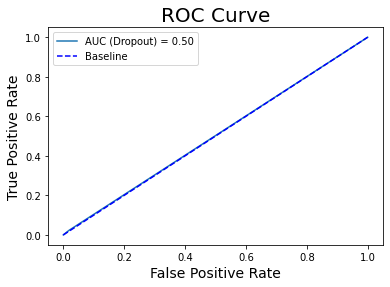

In [71]:
class DeepNeuralNetworkDropout:
  def __init__(self, x,x_test_scaled,y, y2, units, hidden_layer, rate):
    np.random.seed(42)

    self.weights = {}
    self.input = x_train_scaled
    self.neuron_input = self.input.shape[1]
    self.neuron_output = 1
    self.rate = rate
    self.mask = []

    for i in range(hidden_layer): 
      self.weights[i] = np.random.rand(self.neuron_input,units) * np.sqrt(1. / self.input.shape[1])
      self.neuron_input = units
    self.weights[hidden_layer] = np.random.randn(units, self.neuron_output) * np.sqrt(1. / units)
    
    self.y = y
    self.output = np.zeros(y.shape)

  def forward_prop(self, hidden_layer):
    self.layer = {}
    self.D = {}

    self.layer[0] = tanh(np.dot(self.input, self.weights[0]))
    self.D[0] = np.random.rand(self.layer[0].shape[0],self.layer[0].shape[1])
    self.D[0] = (self.D[0] < self.rate)
    self.layer[0] = self.layer[0] * self.D[0]
    self.layer[0] = self.layer[0] / self.rate

    for i in range(hidden_layer+1): #jml hl+1
      if i != 0:
        self.layer[i] = tanh(np.dot(self.layer[i-1], self.weights[i]))
        self.D[i] = np.random.rand(self.layer[i].shape[0],self.layer[i].shape[1])
        self.D[i] = (self.D[0] < self.rate)
        self.layer[i] = self.layer[i] * self.D[i]
        self.layer[i] = self.layer[i] / self.rate
      if i == hidden_layer:
        self.layer[i] = sigmoid(np.dot(self.layer[i-1], self.weights[i]))
        self.D[i] = np.random.rand(self.layer[i].shape[0],self.layer[i].shape[1])
        self.D[i] = (self.D[i] < self.rate)
        self.layer[i] = self.layer[i] * self.D[i]
        # self.layer[i] = self.layer[i] / self.rate
    return self.layer[i]

  def backward_prop(self, hidden_layer):
    dW = {}
    E = {}

    E[hidden_layer] = 2*(self.y - self.output) * sigmoid_derivative(self.output)
    E[hidden_layer] = E[hidden_layer] * self.D[hidden_layer]
    # E[hidden_layer] = E[hidden_layer] / self.rate
    self.layer[hidden_layer-1] = np.multiply(E[hidden_layer], np.int64(self.layer[hidden_layer]>0))
    dW[hidden_layer] = np.dot(self.layer[hidden_layer-1].T, E[hidden_layer])

    for i in reversed(range(hidden_layer)): 
      if i != 0:
        E[i] = np.dot(E[i+1], self.weights[i+1].T) * tanh_derivative(self.layer[i])
        E[i] = E[i] * self.D[i]
        # E[i] = E[i] / self.rate
        self.layer[i] = np.multiply(E[i], np.int64(self.layer[i]>0))
        dW[i] = np.dot(self.layer[i-1].T,E[i])
      if i == 0:
        E[0]= np.dot(E[1], self.weights[1].T) * tanh_derivative(self.layer[0])
        E[i] = E[i] * self.D[i]
        # E[i] = E[i] / self.rate
        self.layer[i] = np.multiply(E[i], np.int64(self.layer[i]>0))
        dW[0] = np.dot(self.input.T, E[0])
    for i in range(hidden_layer+1):
      self.weights[i] += 0.01* dW[i]  #0.01 lr

  def train(self, X, y, hidden_layer):
    self.output = self.forward_prop(hidden_layer)
    self.backward_prop(hidden_layer)
  
  def hitung_akurasi(self, X, y):
    predictions = []
    counter = 0

    for i in range(len(y)):
      if self.output[i] >= 0.5:
        prediksi = 1
      else:
        prediksi = 0
      predictions.append(prediksi)

      if predictions[i] == y[i]:
        counter = counter+1
        
    akurasi = (counter/len(y)) * 100    

    cm = confusion_matrix(predictions, y)
    true_positive = cm[1,1]
    true_negative = cm[0,0]
    false_positive = cm[0,1]
    false_negative = cm[1,0]

    auc = roc_auc_score(predictions, y)
    print('\n') 

    tpr = true_positive / (true_positive + false_negative)
    fpr = false_positive / (false_positive + true_negative)
    gmean = math.sqrt(tpr*(1-fpr))

    print('G-mean: '+ str(gmean))


    print('Akurasi: '+ str(akurasi))

  def akurasi_testing(self, x_test_scaled, y2):
    predictions = []
    counter = 0

    for i in range(len(y2)):
      if self.output[i] >= 0.5:
        prediksi = 1
      else:
        prediksi = 0
      predictions.append(prediksi)

      if predictions[i] == y2[i]:
        counter = counter+1
        
    akurasi = (counter/len(y2)) * 100
    print('\n')
    print('Akurasi testing: '+ str(akurasi))
    print('\n')
    cm = confusion_matrix(predictions, y2)
    
    print(cm)
    true_positive = cm[1,1]
    true_negative = cm[0,0]
    false_positive = cm[0,1]
    false_negative = cm[1,0]

    print('True Negative = ', true_negative)
    print('False Negative = ', false_negative)
    print('True Positive = ', true_positive)
    print('False Positive = ', false_positive)
    print('\n') 
    auc = roc_auc_score(predictions, y2)
    print('ROC: '+ str(auc))
    print('\n') 

    tpr = true_positive / (true_positive + false_negative)
    fpr = false_positive / (false_positive + true_negative)
    gmean = math.sqrt(tpr*(1-fpr))

    acc = (true_positive + true_negative) / (true_positive + false_negative + true_negative + false_positive)

    print('TPR: '+ str(tpr))
    print('FPR: '+ str(fpr))
    print('G-mean: '+ str(gmean))
    print('acc: '+ str(acc))


    fpr2, tpr2, thres2 = roc_curve(predictions, y2)

    plt.plot(fpr2, tpr2, label=f'AUC (Dropout) = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
    plt.title('ROC Curve', size=20)
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend();

DNN_dropout = DeepNeuralNetworkDropout(X, x_test_scaled, y, y2, 5, 5, 0.8) #units, hl, rate
for i in range(10): 
  print ("Epoch: " + str(i+1))
  forward = DNN_dropout.forward_prop(5)
  print ("Loss: " + str(np.mean(np.square(y - forward)))) # mean sum squared loss


  csl = forward + (42336/781)
  csl = scaler_csl.fit_transform(csl)
  csl_max = np.max(csl)

  class_weights = {0: 1.0, 1: csl_max}
  cw = compute_class_weight(class_weights, classes=np.arange(2), y=np.array(y_test))

  print('---------------')
  print(cw)
  print('---------------')

  DNN_dropout.train(X, y, 5)

  DNN_dropout.hitung_akurasi(X,y)
DNN_dropout.akurasi_testing(x_test_scaled,y2)